In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
%matplotlib inline

from google.colab import drive

In [ ]:
import seaborn as sns
from scipy.stats import f_oneway

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import statistics

In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import figure
from scipy.stats import shapiro
from scipy.stats import pearsonr
import pylab as py
from sklearn.linear_model import LogisticRegression

In [ ]:
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import mean_squared_error
!pip install scikit-learn

[pokemon-database](https://www.kaggle.com/datasets/mrdew25/pokemon-database)

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pokemon = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pokemon Database.csv')

In [ ]:
pd.set_option('display.max_rows', 1080)
pd.set_option('display.max_columns', 50)

In [ ]:
pokemon.head(5)

,Pokemon Id,Pokedex Number,Pokemon Name,Classification,Alternate Form Name,Original Pokemon ID,Legendary Type,Pokemon Height,Pokemon Weight,Primary Type,Secondary Type,Primary Ability,Primary Ability Description,Secondary Ability,Secondary Ability Description,Hidden Ability,Hidden Ability Description,Special Event Ability,Special Event Ability Description,Male Ratio,Female Ratio,Base Happiness,Game(s) of Origin,Health Stat,Attack Stat,Defense Stat,Special Attack Stat,Special Defense Stat,Speed Stat,Base Stat Total,Health EV,Attack EV,Defense EV,Special Attack EV,Special Defense EV,Speed EV,EV Yield Total,Catch Rate,Experience Growth,Experience Growth Total,Primary Egg Group,Secondary Egg Group,Egg Cycle Count,Pre-Evolution Pokemon Id,Evolution Details
0,1,1,"""Bulbasaur""","""Seed Pokémon""",NaN,NaN,NaN,0.7,6.9,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Red""",45,49,49,65,65,45,318,0,0,0,1,0,0,1,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN
1,2,2,"""Ivysaur""","""Seed Pokémon""",NaN,NaN,NaN,1.0,13.0,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Red""",60,62,63,80,80,60,405,0,0,0,1,1,0,2,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,1.0,"""Level 16"""
2,3,3,"""Venusaur""","""Seed Pokémon""",NaN,NaN,NaN,2.0,100.0,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Red""",80,82,83,100,100,80,525,0,0,0,2,1,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,2.0,"""Level 32"""
3,4,3,"""Venusaur""","""Seed Pokémon""","""Mega""",3.0,NaN,2.4,155.5,"""Grass""","""Poison""","""Thick Fat""","""The Pokémon is protected by a layer of thick ...",NaN,NaN,NaN,NaN,NaN,NaN,87.5,12.5,70,"""X""",80,100,123,122,120,80,625,0,0,0,2,1,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN
4,1526,3,"""Venusaur""","""Seed Pokémon""","""Gigantamax""",3.0,NaN,24.0,0.0,"""Grass""","""Poison""","""Overgrow""","""Powers up Grass-type moves when the Pokémon's...",NaN,NaN,"""Chlorophyll""","""Boosts the Pokémon's Speed stat in harsh sunl...",NaN,NaN,87.5,12.5,50,"""Sword""",80,82,83,100,100,80,525,0,0,0,2,1,0,3,45,"""Medium Slow""",1059860,"""Monster""","""Grass""",20,NaN,NaN


In [ ]:
list(pokemon.columns)

['Pokemon Id',
 'Pokedex Number',
 'Pokemon Name',
 'Classification',
 'Alternate Form Name',
 'Original Pokemon ID',
 'Legendary Type',
 'Pokemon Height',
 'Pokemon Weight',
 'Primary Type',
 'Secondary Type',
 'Primary Ability',
 'Primary Ability Description',
 'Secondary Ability',
 'Secondary Ability Description',
 'Hidden Ability',
 'Hidden Ability Description',
 'Special Event Ability',
 'Special Event Ability Description',
 'Male Ratio',
 'Female Ratio',
 'Base Happiness',
 'Game(s) of Origin',
 'Health Stat',
 'Attack Stat',
 'Defense Stat',
 'Special Attack Stat',
 'Special Defense Stat',
 'Speed Stat',
 'Base Stat Total',
 'Health EV',
 'Attack EV',
 'Defense EV',
 'Special Attack EV',
 'Special Defense EV',
 'Speed EV',
 'EV Yield Total',
 'Catch Rate',
 'Experience Growth',
 'Experience Growth Total',
 'Primary Egg Group',
 'Secondary Egg Group',
 'Egg Cycle Count',
 'Pre-Evolution Pokemon Id',
 'Evolution Details']

In [ ]:
pokemon.describe()

,Pokemon Id,Pokedex Number,Original Pokemon ID,Pokemon Height,Pokemon Weight,Male Ratio,Female Ratio,Base Happiness,Health Stat,Attack Stat,Defense Stat,Special Attack Stat,Special Defense Stat,Speed Stat,Base Stat Total,Health EV,Attack EV,Defense EV,Special Attack EV,Special Defense EV,Speed EV,EV Yield Total,Catch Rate,Experience Growth Total,Egg Cycle Count,Pre-Evolution Pokemon Id
count,1235.000000,1235.000000,206.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,540.000000
mean,938.641296,488.746559,725.514563,2.099271,71.567368,46.923077,37.935223,47.959514,71.428340,81.551417,75.045344,73.496356,72.517409,69.834818,443.873684,0.224291,0.541700,0.255061,0.391903,0.214575,0.323887,1.951417,92.149798,1.061738e+06,31.064777,804.653704
std,539.535263,296.191634,528.956153,5.563404,130.162521,27.620851,25.034171,20.421173,26.987968,32.164255,30.626329,32.715570,27.536926,30.062042,120.048512,0.654662,0.939241,0.650804,0.864536,0.622471,0.721540,0.758039,75.040309,1.572999e+05,29.230748,528.830320
min,1.000000,1.000000,3.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000e+05,0.000000,1.000000
25%,435.500000,224.500000,237.250000,0.600000,8.000000,50.000000,12.500000,50.000000,54.000000,57.500000,52.000000,50.000000,51.000000,45.000000,335.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.000000,1.000000e+06,20.000000,343.500000
50%,984.000000,482.000000,634.500000,1.100000,29.500000,50.000000,50.000000,50.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000,470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,60.000000,1.059860e+06,20.000000,850.000000
75%,1425.500000,746.000000,1267.000000,1.600000,75.000000,50.000000,50.000000,50.000000,85.000000,100.500000,91.500000,95.000000,90.000000,90.500000,521.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,127.000000,1.250000e+06,25.000000,1273.500000
max,1756.000000,1008.000000,1734.000000,100.000000,999.900000,100.000000,100.000000,140.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,1125.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,255.000000,1.640000e+06,120.000000,1755.000000


<ipython-input-14-3f2ffaf93761>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(pokemon.corr(), vmin=-1, vmax=1, annot=True)


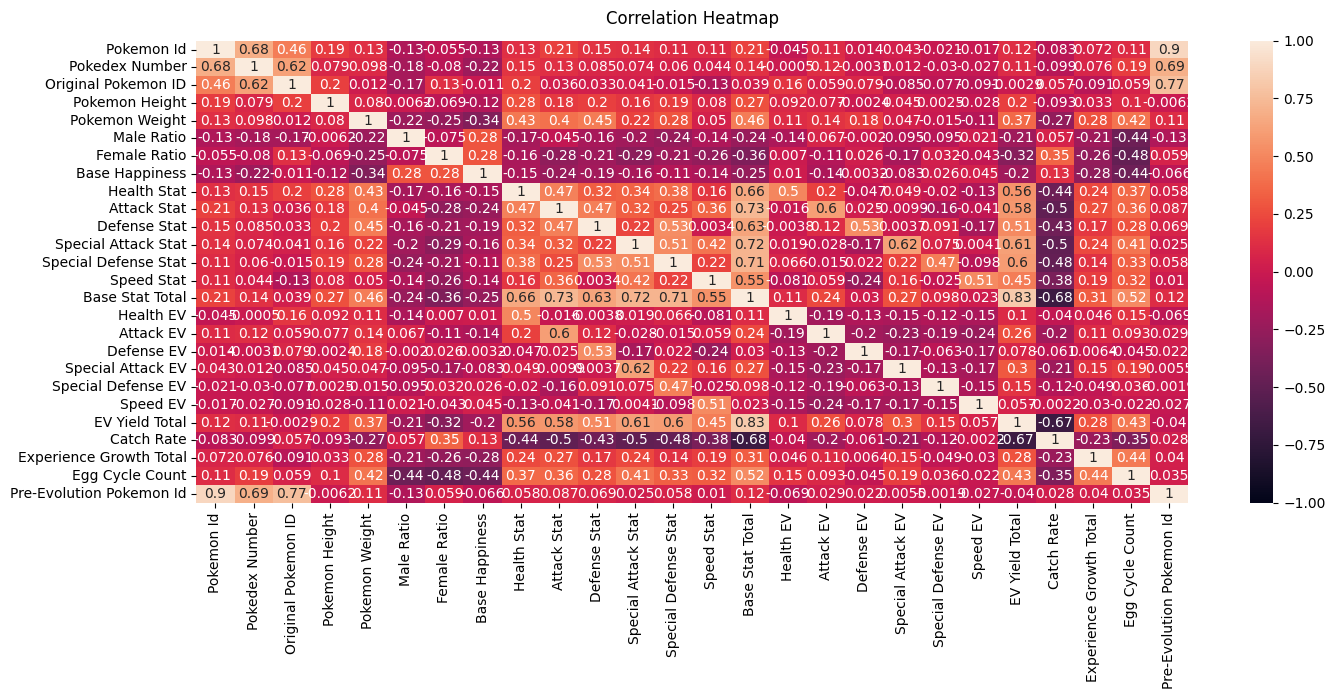

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(pokemon.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

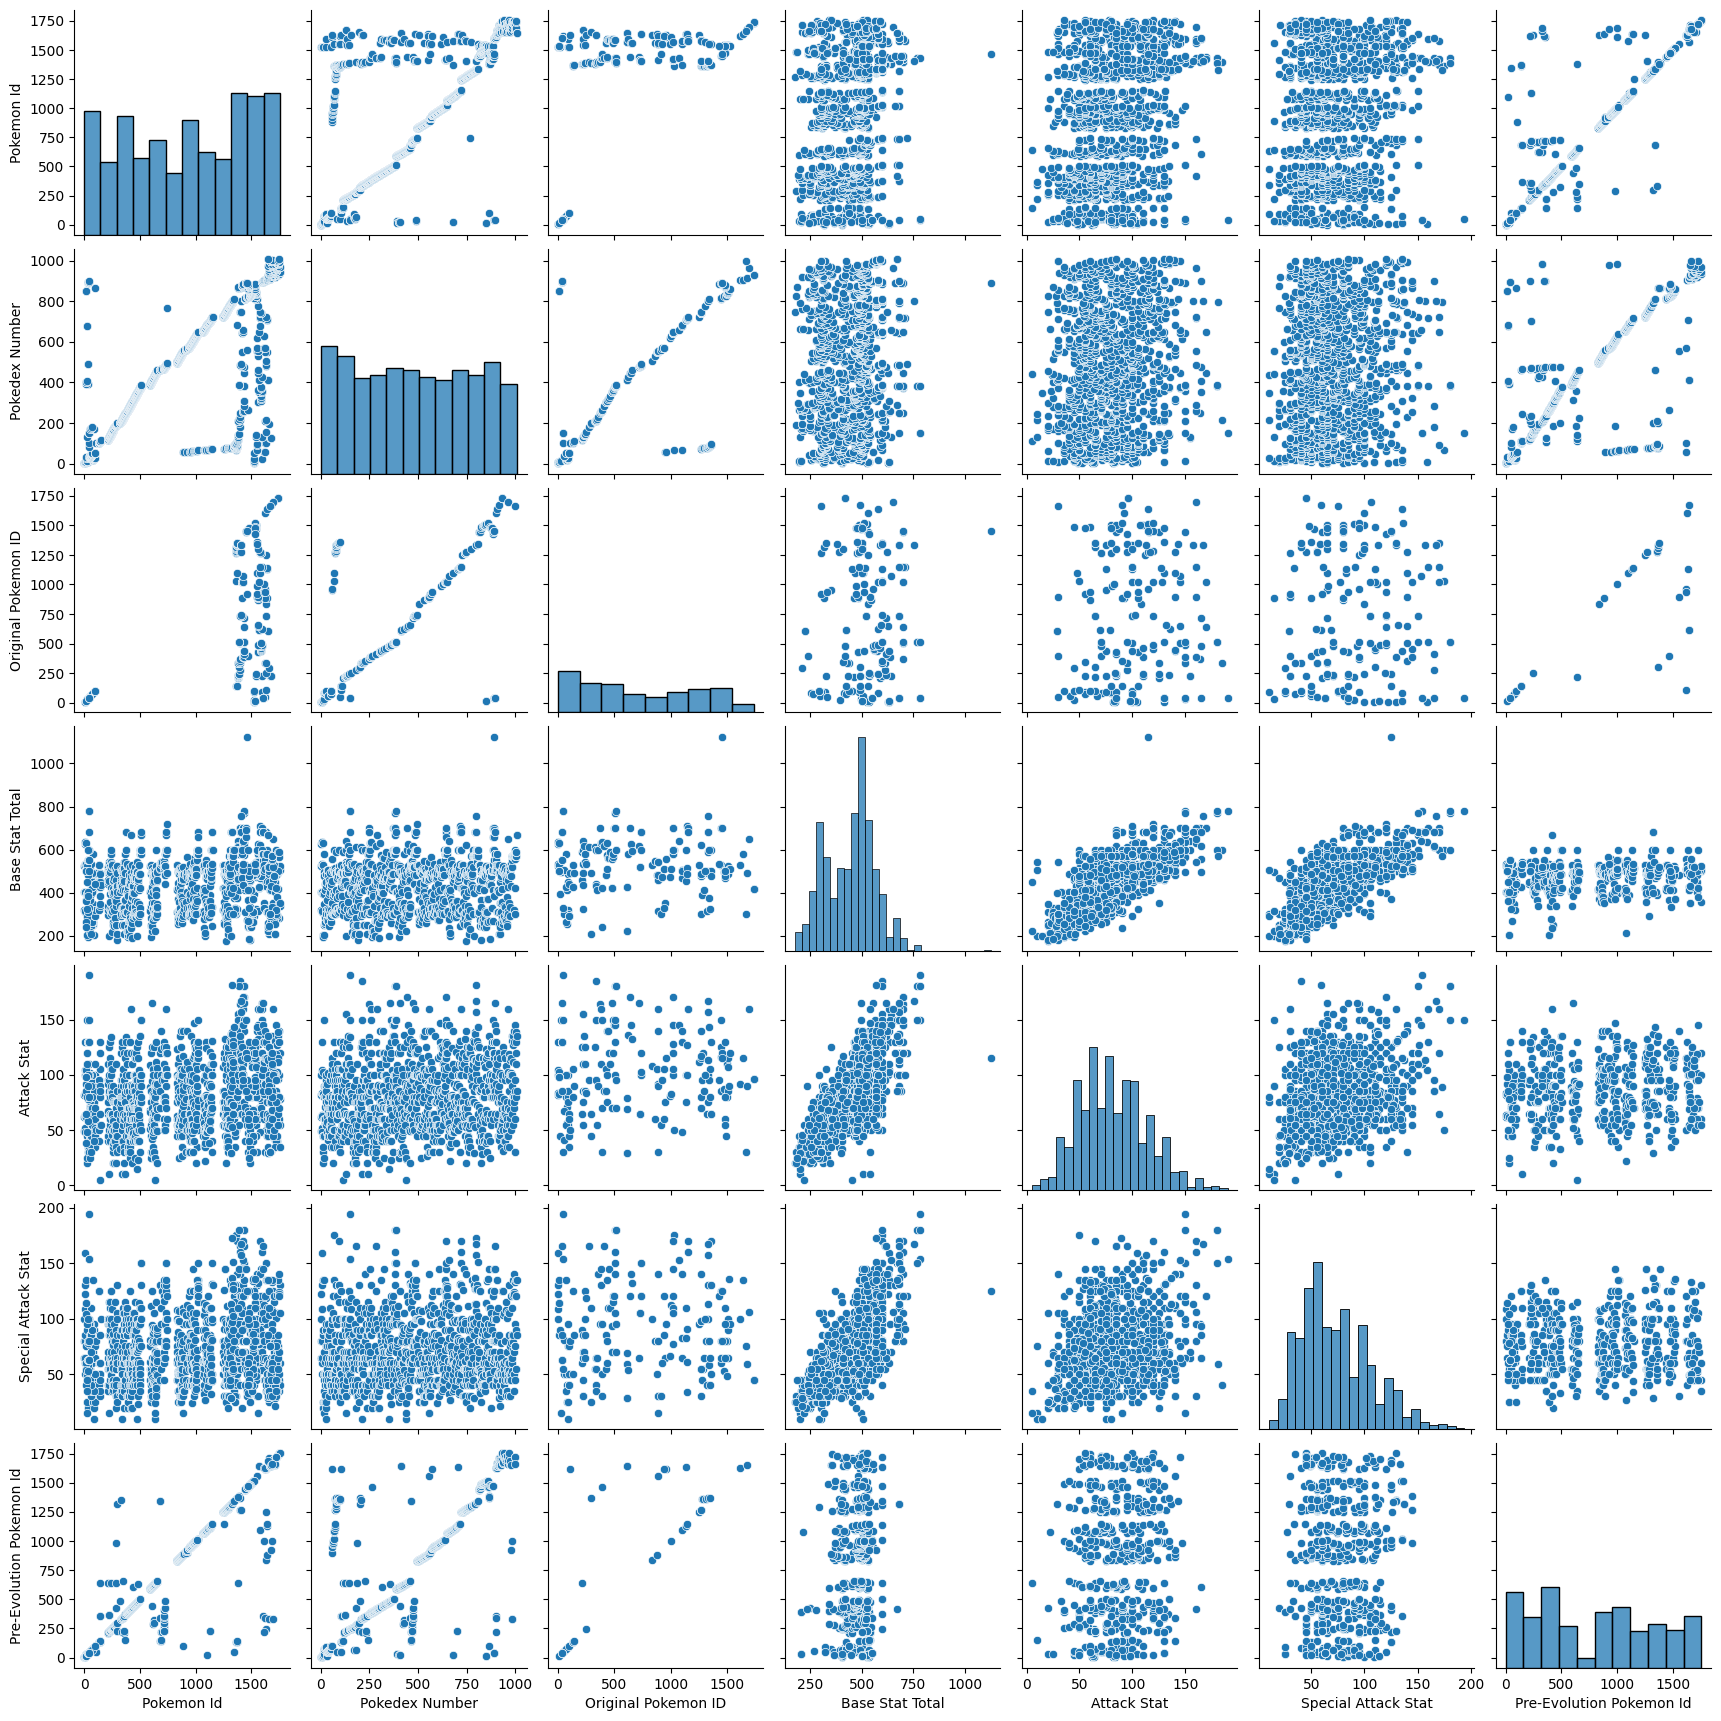

In [ ]:
sns.pairplot(pokemon,vars=['Pokemon Id',
 'Pokedex Number',
 'Original Pokemon ID',
 'Base Stat Total',
 'Attack Stat',
 'Special Attack Stat',
 'Pre-Evolution Pokemon Id',])

In [ ]:
dep = 'Attack Stat'
indep = 'Base Stat Total'

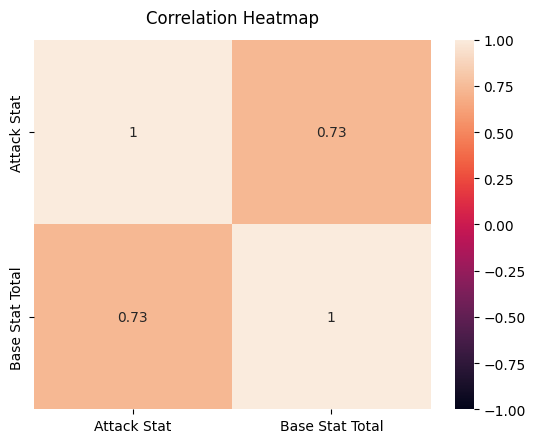

In [ ]:
heatmap = sns.heatmap(pokemon[[dep,indep]].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<Axes: >

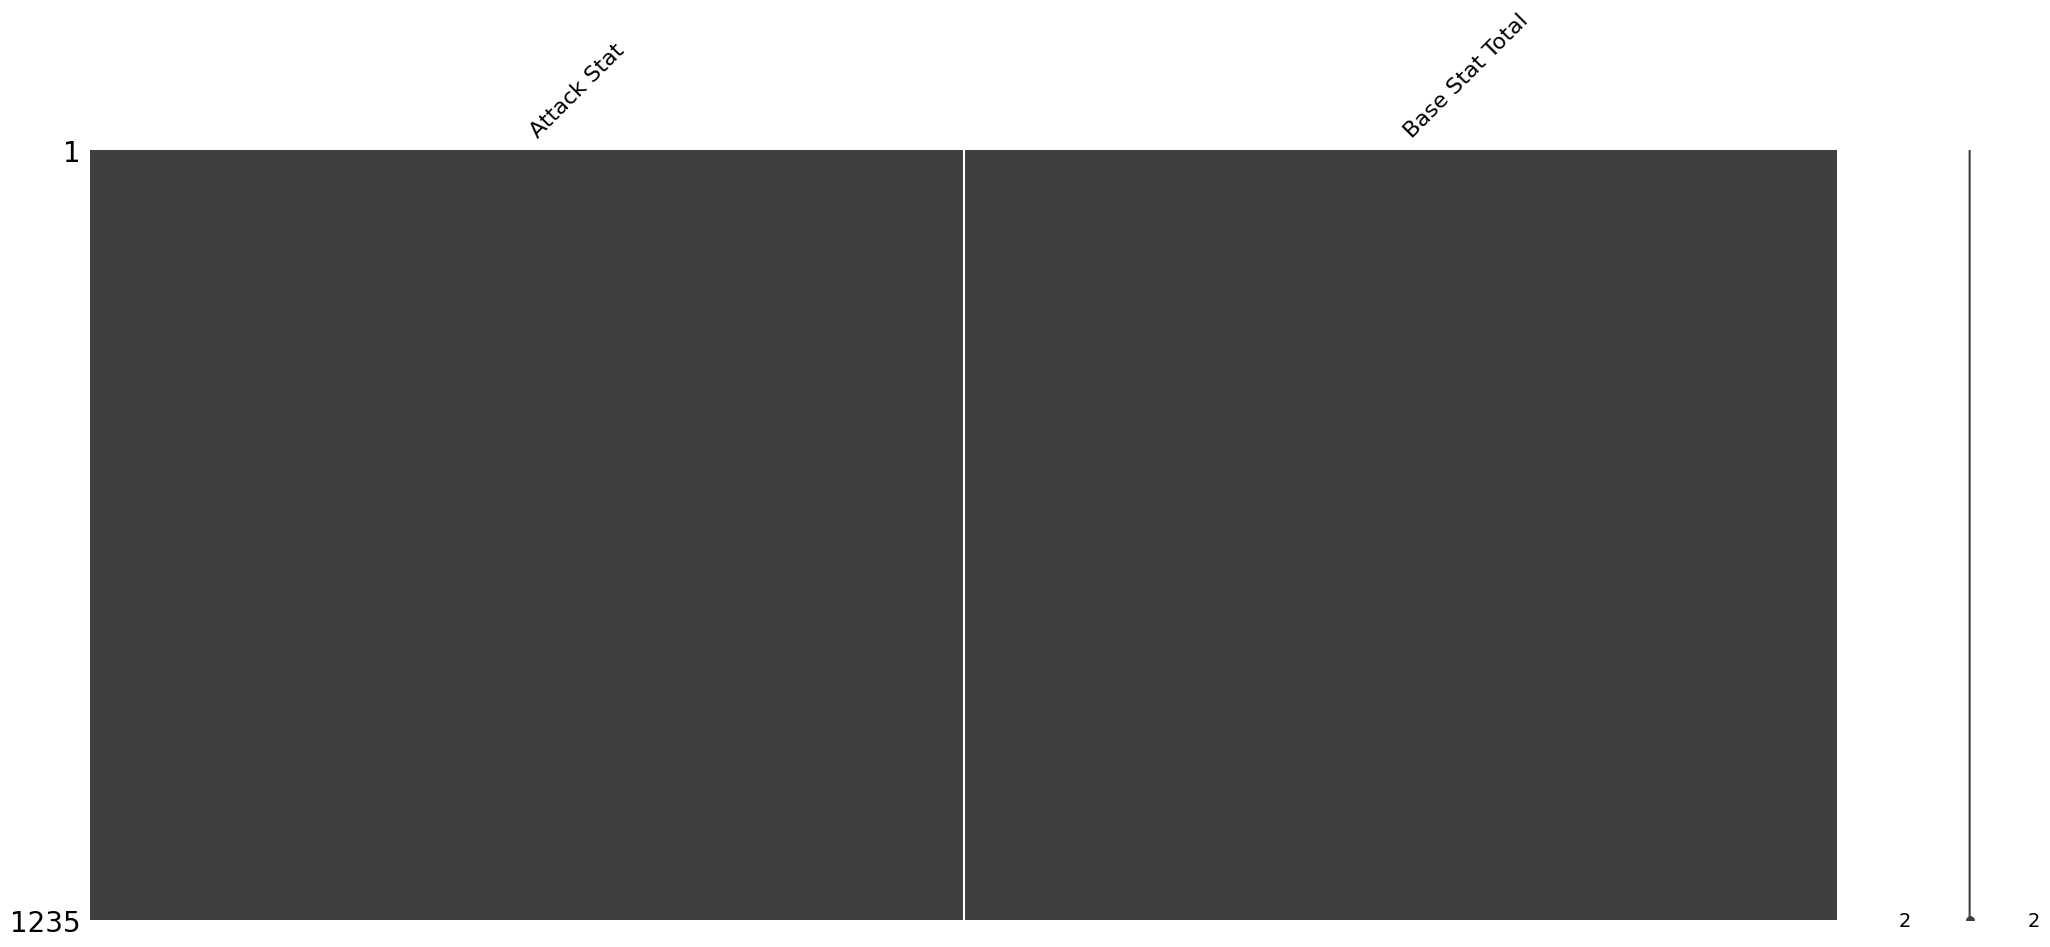

In [ ]:
msno.matrix(pokemon[[dep,indep]])

In [ ]:
pokemon[dep].describe()

count    1235.000000
mean       81.551417
std        32.164255
min         5.000000
25%        57.500000
50%        80.000000
75%       100.500000
max       190.000000
Name: Attack Stat, dtype: float64

In [ ]:
pokemon[indep].describe()

count    1235.000000
mean      443.873684
std       120.048512
min       175.000000
25%       335.000000
50%       470.000000
75%       521.000000
max      1125.000000
Name: Base Stat Total, dtype: float64

Text(0.5, 0, 'Attack Stat')

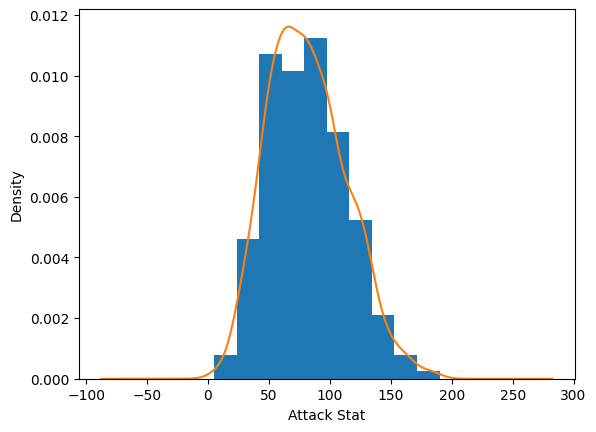

In [ ]:
ax = pokemon[dep].plot.hist(density=True)
pokemon[dep].plot.density(ax=ax)
ax.set_xlabel(dep)

Text(0.5, 0, 'Base Stat Total')

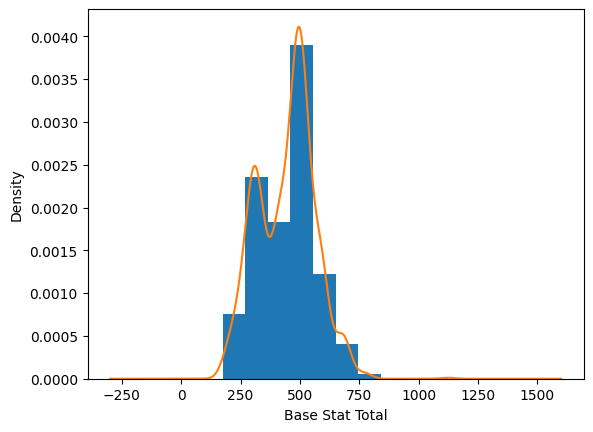

In [ ]:
ax = pokemon[indep].plot.hist(density=True)
pokemon[indep].plot.density(ax=ax)
ax.set_xlabel(indep)

(1235, 1) (1235, 1)


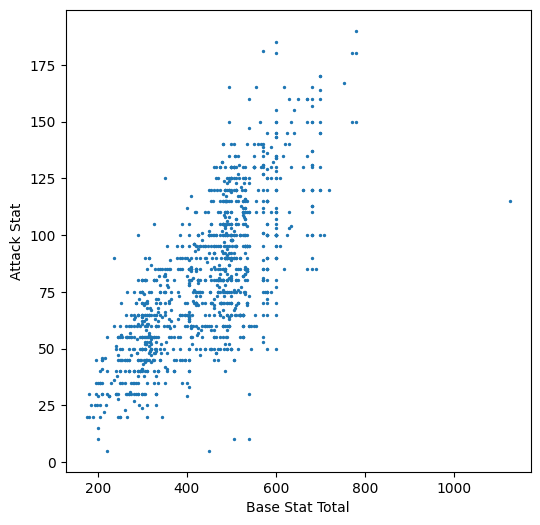

In [ ]:
x = pokemon[indep].values.reshape(-1, 1)
y = pokemon[dep].values.reshape(-1, 1)

print(x.shape, y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.xlabel(indep)
plt.ylabel(dep)

plt.show()

# **Teste de Hipótese**

In [ ]:
grupoA = [5]*30
grupoB = [5]*30
mediaA = []
quantilA = []
mediaB = []
quantilB = []
for i in range (30):
  grupoA[i] = pokemon[dep].sample(frac=0.3).dropna()
  grupoB[i] = pokemon[indep].sample(frac=0.3).dropna()


  mediaA.append(grupoA[i].mean())
  quantilA.append(grupoA[i].quantile(0.9))

  mediaB.append(grupoB[i].mean())
  quantilB.append(grupoB[i].quantile(0.9))

stat=0.980, p=0.836
A média do grupo A provavelmente segue uma Distribuição Normal
stat=0.970, p=0.534
A média do grupo B provavelmente segue uma Distribuição Normal


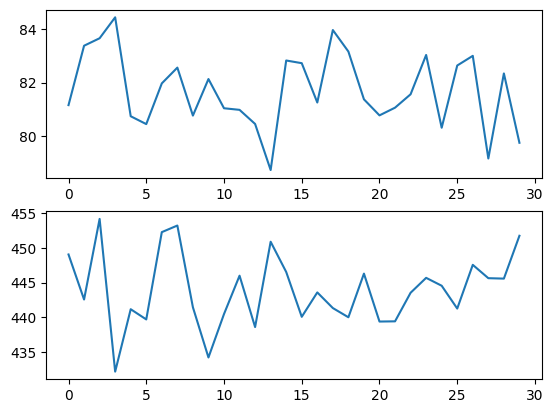

In [ ]:
plt.subplot(2,1,1)
plt.plot(mediaA)
data = mediaA
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('A média do grupo A provavelmente segue uma Distribuição Normal')
else:
	print('A média do grupo A provavelmente NÃO segue uma Distribuição Normal')

plt.subplot(2,1,2)
plt.plot(mediaB)
data = mediaB
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('A média do grupo B provavelmente segue uma Distribuição Normal')
else:
	print('A média do grupo B provavelmente NÃO segue uma Distribuição Normal')

plt.show()

In [ ]:
statistics.stdev(mediaA)

1.4091129108961358

In [ ]:
statistics.stdev(mediaB)

5.343112482712061

stat=0.786, p=0.000
O percentil90 do grupo A provavelmente NÃO seguem uma Distribuição Normal
stat=0.432, p=0.017
As variáveis do grupo A Provavelmente são Dependentes


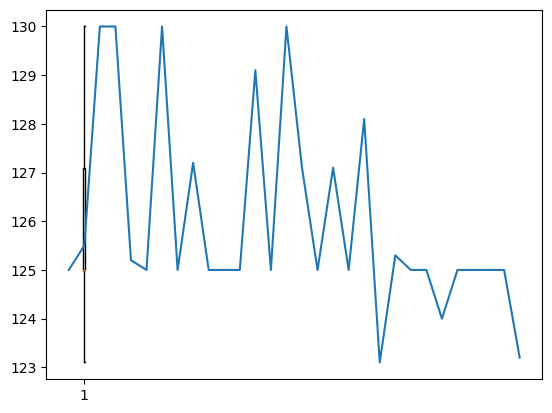

In [ ]:
plt.boxplot(quantilA)
plt.plot(quantilA)
data = quantilA
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('O percentil90 do grupo A provavelmente segue uma Distribuição Normal')
else:
	print('O percentil90 do grupo A provavelmente NÃO seguem uma Distribuição Normal')

data1 = quantilA
data2 = mediaA
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('As variáveis do grupo A Provavelmente são Independentes')
else:
	print('As variáveis do grupo A Provavelmente são Dependentes')

stat=0.659, p=0.000
As variáveis do grupo B provavelmente NÃO seguem uma Distribuição Normal
stat=0.610, p=0.000
As variáveis do grupo B são Provavelmente Dependentes


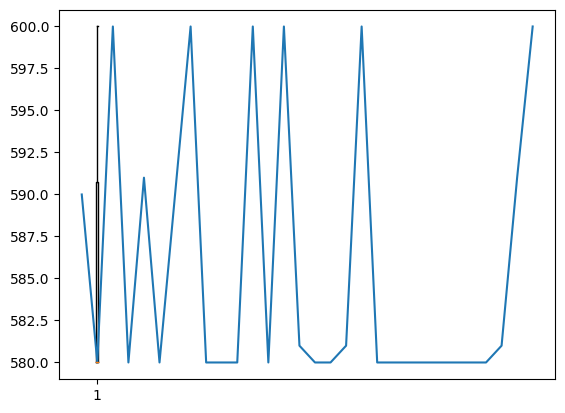

In [ ]:
plt.boxplot(quantilB)
plt.plot(quantilB)
data = quantilB
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
	print('As variáveis do grupo B provavelmente seguem uma Distribuição Normal')
else:
	print('As variáveis do grupo B provavelmente NÃO seguem uma Distribuição Normal')

data1 = quantilB
data2 = mediaB
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('As variáveis do grupo B são Provavelmente Independentes')
else:
	print('As variáveis do grupo B são Provavelmente Dependentes')

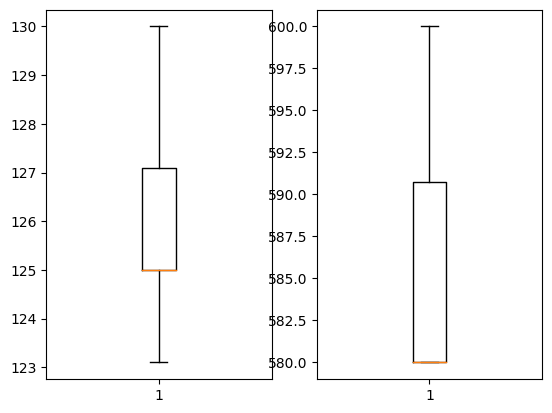

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(quantilA)
plt.subplot(1,2,2)
plt.boxplot(quantilB)
plt.show()

In [ ]:
stat, p = f_oneway(grupoA[0],grupoB[0])

# Imprimindo os resultados
print("Estatística de teste F: {:.3f}".format(stat))
print("valor-p: {:.3f}".format(p))

if p < 0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística de teste F: 3099.889
valor-p: 0.000
Rejeitamos a hipótese nula.


--# **ABORDAGEM PARAMETRICA**

## Regressão Linear


In [ ]:
def correlation(x, y):
    x1 = (x - np.mean(x))
    y1 = (y - np.mean(y))

    num = np.sum(x1*y1)
    div = np.sqrt(np.sum(x1**2) * np.sum(y1**2))
    return num/div

In [ ]:
class MyLinearRegression():
    def __init__(self):
        self.b0 = 0.0
        self.b1 = 0.0

    def fit(self, x, y):
        self.b1 = correlation(x, y) * np.std(y) / np.std(x)
        self.b0 = np.mean(y) - (self.b1 * np.mean(x))

    def predict(self, x):
        return self.b0 + self.b1*x

b0: -5.1700752040855065 b1: 0.1953742591484713


Text(0.5, 0, 'Base Stat Total')

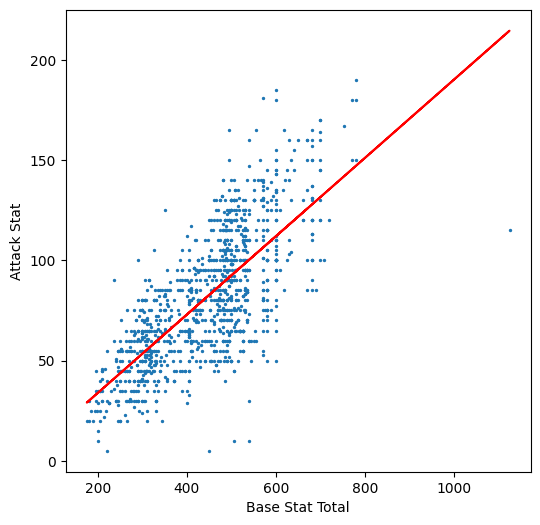

In [ ]:
reg = MyLinearRegression()
reg.fit(x, y)

print('b0: {} b1: {}'.format(reg.b0, reg.b1))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c='red')
plt.ylabel(dep)
plt.xlabel(indep)

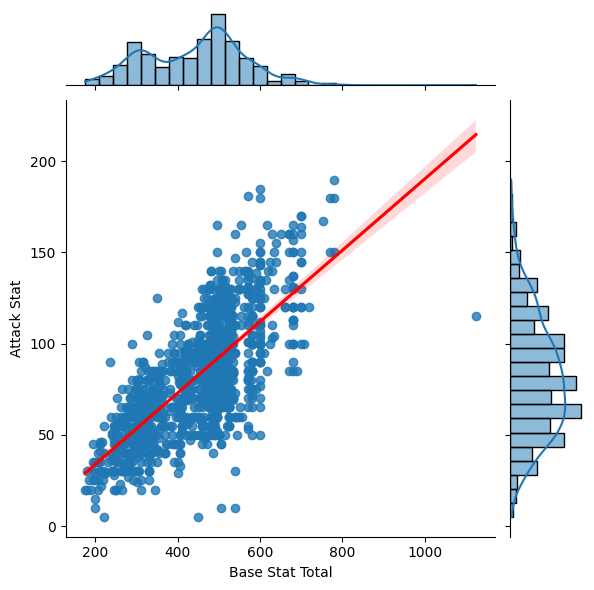

In [ ]:
sns.jointplot(y=dep, x=indep, data=pokemon, kind="reg", line_kws={'color': 'red'})


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y, reg.predict(x))
print("R-squared:", r2)

R-squared: 0.5317423658599294


## Regressao Polinomial

### Regressão Quadrática

In [ ]:
class PolynomialRegression():
    def __init__(self, degree=2):
        self.degree = degree
        self.b = None

    def fit(self, x, y):
        powers = self.__compute_powers(x)

        b1 = np.linalg.inv(np.dot(powers.T, powers))
        b2 = np.dot(powers.T, y)
        self.b = np.dot(b1, b2)

    def predict(self, x):
        powers = self.__compute_powers(x)
        return np.dot(powers, self.b)

    def __compute_powers(self, x):
        x = x.ravel()
        powers = np.empty((x.shape[0], self.degree + 1))
        powers[:, 0] = np.ones(x.shape[0])
        powers[:, 1] = x

        for p in range(2, self.degree+1):
            powers[:, p] = x**p
        return powers

In [ ]:
reg = PolynomialRegression()
reg.fit(x, y)

print(reg.b)

[[-1.58523159e+01]
 [ 2.46520319e-01]
 [-5.68533340e-05]]


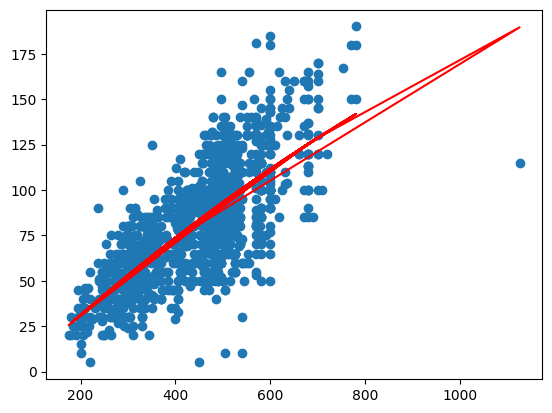

In [ ]:
y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

In [ ]:
r2 = r2_score(y,y_pred)
print("R-squared:", r2)

R-squared: 0.5331436711489931


### Regressão Cúbica

[[ 1.89149519e+01]
 [ 1.45889035e-02]
 [ 4.13989995e-04]
 [-2.93694236e-07]]


Text(0, 0.5, 'Attack Stat')

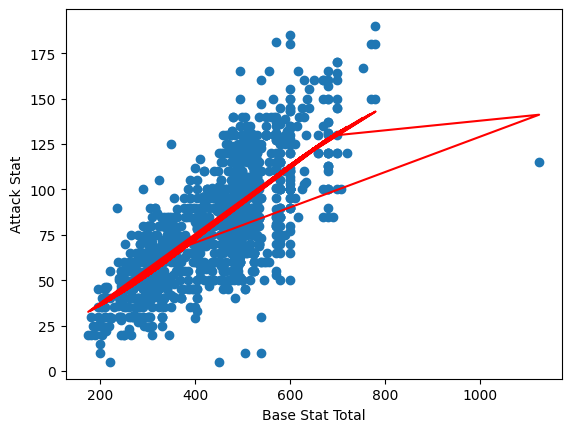

In [ ]:
reg = PolynomialRegression(degree=3)
reg.fit(x, y)

print(reg.b)

y_pred = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel(indep)
plt.ylabel(dep)

In [ ]:
r2 = r2_score(y,y_pred)
print("R-squared:", r2)

R-squared: 0.5366858387213052


⠘⡀⠀**COMMON QUADRATIC GAP**⠀⠀⡜⠀⠀⠀ ⠀⠀⠀
  ⠑⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡔⠁⠀⠀⠀ ⠀⠀⠀⠀
   ⠈⠢⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⠴⠊⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀⠀⠀
      ⢸⠀⠀⠀⢀⣀⣀⣀⣀⣀⡀⠤⠄⠒⠈⠀⠀⠀⠀⠀⠀⠀⠀ ⠀⠀⠀⠀⠀
      ⠘⣀⠄⠊⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ ⠀
⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⠛⠛⠋⠉⠈⠉⠉⠉⠉⠛⠻⢿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⡿⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠛⢿⣿⣿⣿⣿
⣿⣿⣿⣿⡏⣀⠀⠀⠀⠀⠀⠀⠀⣀⣤⣤⣤⣄⡀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿
⣿⣿⣿⢏⣴⣿⣷⠀⠀⠀⠀⠀⢾⣿⣿⣿⣿⣿⣿⡆⠀⠀⠀⠀⠀⠀⠀⠈⣿⣿
⣿⣿⣟⣾⣿⡟⠁⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⣿⣿⣷⢢⠀⠀⠀⠀⠀⠀⠀⢸⣿
⣿⣿⣿⣿⣟⠀⡴⠄⠀⠀⠀⠀⠀⠀⠙⠻⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⣿
⣿⣿⣿⠟⠻⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠶⢴⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀⠀⣿
⣿⣁⡀⠀⠀⢰⢠⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣼⣿⣿⣿⣿⣿⡄⠀⣴⣶⣿⡄⣿
⣿⡋⠀⠀⠀⠎⢸⣿⡆⠀⠀⠀⠀⠀⠀⣴⣿⣿⣿⣿⣿⣿⣿⠗⢘⣿⣟⠛⠿⣼
⣿⣿⠋⢀⡌⢰⣿⡿⢿⡀⠀⠀⠀⠀⠀⠙⠿⣿⣿⣿⣿⣿⡇⠀⢸⣿⣿⣧⢀⣼
⣿⣿⣷⢻⠄⠘⠛⠋⠛⠃⠀⠀⠀⠀⠀⢿⣧⠈⠉⠙⠛⠋⠀⠀⠀⣿⣿⣿⣿⣿
⣿⣿⣧⠀⠈⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠟⠀⠀⠀⠀⢀⢃⠀⠀⢸⣿⣿⣿⣿
⣿⣿⡿⠀⠴⢗⣠⣤⣴⡶⠶⠖⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡸⠀⣿⣿⣿⣿
⣿⣿⣿⡀⢠⣾⣿⠏⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠉⠀⣿⣿⣿⣿
⣿⣿⣿⣧⠈⢹⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿
⣿⣿⣿⣿⡄⠈⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣴⣾⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣦⣄⣀⣀⣀⣀⠀⠀⠀⠀⠘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡄⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠙⣿⣿⡟⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⠀⠁⠀⠀⠹⣿⠃⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⡿⠛⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⢐⣿⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⠿⠛⠉⠉⠁⠀⢻⣿⡇⠀⠀⠀⠀⠀⠀⢀⠈⣿⣿⡿⠉⠛⠛⠛⠉⠉
⣿⡿⠋⠁⠀⠀⢀⣀⣠⡴⣸⣿⣇⡄⠀⠀⠀⠀⢀⡿⠄⠙⠛⠀⣀⣠⣤⣤⠄⠀

# ABORDAGEM NÃO PARAMETRICA

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/kernel_regression.py:251: RuntimeWarning: invalid value encountered in divide
  B_x = (G_numer * d_fx - G_denom * d_mx) / (G_denom**2)
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/kernel_regression.py:238: RuntimeWarning: invalid value encountered in divide
  G = G_numer / G_denom
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/kernel_regression.py:250: RuntimeWarning: invalid value encountered in divide
  B_x = d_mx / f_x - G * d_fx / f_x


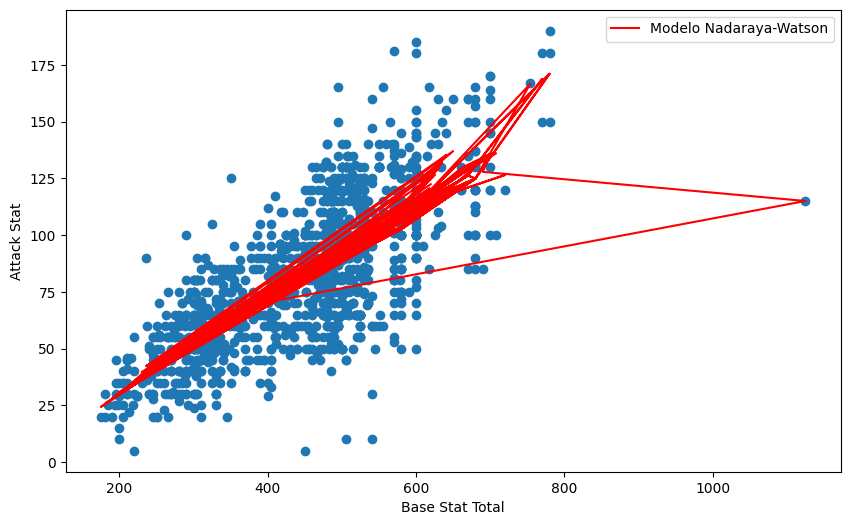

In [ ]:
# Ajusta o modelo de regressão de Nadaraya-Watson com um kernel Gaussiano

model = KernelReg(pokemon[dep], pokemon[indep], var_type='c', reg_type='lc', bw='cv_ls')
smoothed, _ = model.fit(pokemon[indep])

# Plota os dados originais e o modelo ajustado
plt.figure(figsize=(10, 6))
plt.scatter(pokemon[indep], pokemon[dep])
plt.plot(pokemon[indep], smoothed, color='red', label='Modelo Nadaraya-Watson')
plt.xlabel(indep)
plt.ylabel(dep)
plt.legend()
plt.show()

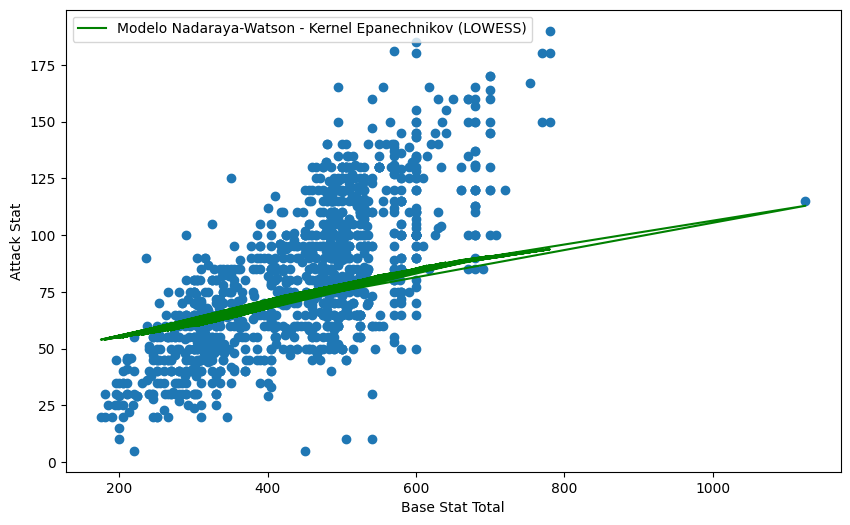

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.nonparametric.smoothers_lowess import lowess
def unzip(x):
  x
  x,y = zip(*x)
  return list(y)

# Ajusta o modelo de regressão de Nadaraya-Watson com um kernel Epanechnikov (usando LOWESS)
lowess_model = lowess(pokemon[dep], pokemon[indep], frac=0.3)
smoothed_lowess = lowess_model[pokemon[indep]]

# Plota os dados originais e o modelo ajustado
plt.figure(figsize=(10, 6))
plt.scatter(pokemon[indep], pokemon[dep])
plt.plot(pokemon[indep], unzip(smoothed_lowess), color='green', label='Modelo Nadaraya-Watson - Kernel Epanechnikov (LOWESS)')
plt.xlabel(indep)
plt.ylabel(dep)
plt.legend()
plt.show()

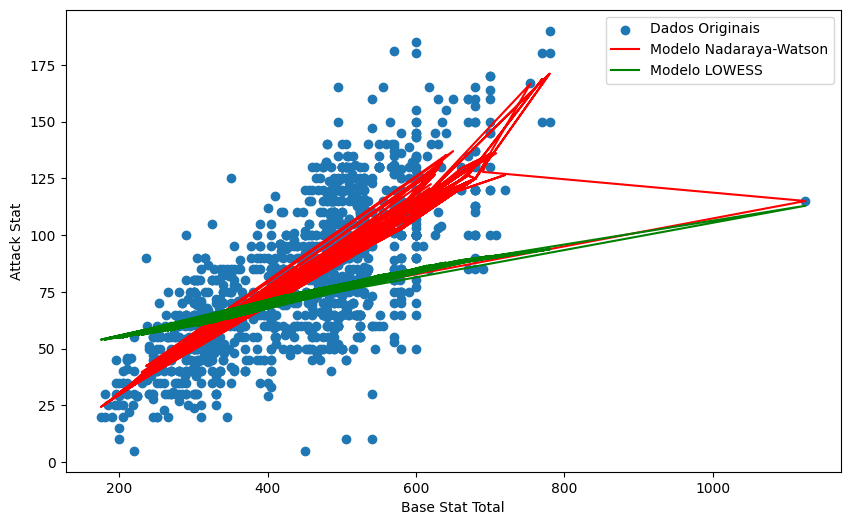

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.nonparametric.kernel_regression import KernelReg

# Ajusta o modelo de regressão de Nadaraya-Watson
model = KernelReg(pokemon[dep], pokemon[indep], var_type='c', reg_type='lc', bw='cv_ls')
smoothed, _ = model.fit(pokemon[indep])

# Ajusta o modelo de regressão de Nadaraya-Watson com um kernel Epanechnikov (usando LOWESS)
lowess_model = lowess(pokemon[dep], pokemon[indep], frac=0.3)
smoothed_lowess = lowess_model[pokemon[indep]]

# Plota os dados originais e os modelos ajustados
plt.figure(figsize=(10, 6))
plt.scatter(pokemon[indep], pokemon[dep], label='Dados Originais')
plt.plot(pokemon[indep], smoothed, color='red', label='Modelo Nadaraya-Watson')
plt.plot(pokemon[indep], unzip(smoothed_lowess), color='green', label='Modelo LOWESS')
plt.xlabel(indep)
plt.ylabel(dep)
plt.legend()
plt.show()

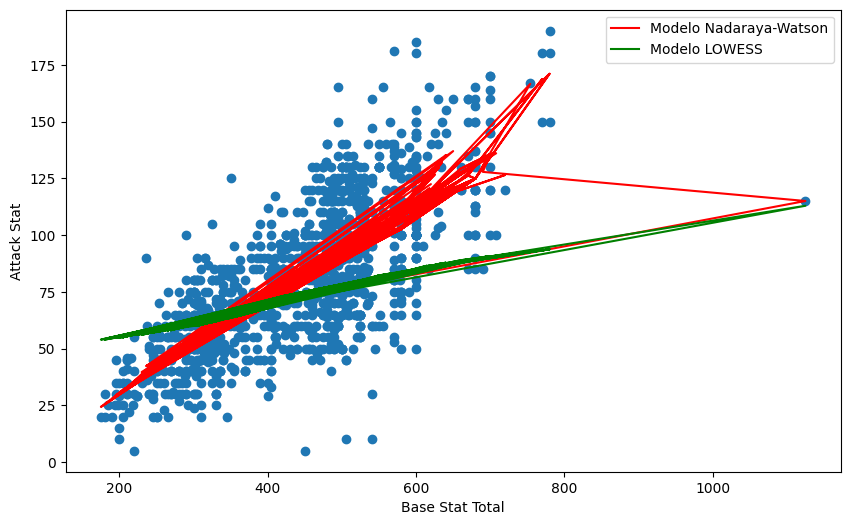

MSE Nadaraya-Watson: 459.45485397903826
MSE LOWESS: 766.9952205531844
O melhor modelo é: Nadaraya-Watson


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.metrics import mean_squared_error

# Ajusta o modelo de regressão de Nadaraya-Watson
model = KernelReg(pokemon[dep], pokemon[indep], var_type='c', reg_type='lc', bw='cv_ls')
smoothed, _ = model.fit(pokemon[indep])

# Ajusta o modelo de regressão de Nadaraya-Watson com um kernel Epanechnikov (usando LOWESS)
lowess_model = lowess(pokemon[dep], pokemon[indep], frac=0.3)
smoothed_lowess = lowess_model[pokemon[indep]]

# Plota os dados originais e os modelos ajustados
plt.figure(figsize=(10, 6))
plt.scatter(pokemon[indep] ,pokemon[dep])
plt.plot(pokemon[indep], smoothed, color='red', label='Modelo Nadaraya-Watson')
plt.plot(pokemon[indep], unzip(smoothed_lowess), color='green', label='Modelo LOWESS')
plt.xlabel(indep)
plt.ylabel(dep)
plt.legend()
plt.show()

# Calcula e imprime o MSE para cada modelo
mse_nadaraya_watson = mean_squared_error(pokemon[dep], smoothed)
mse_lowess = mean_squared_error(pokemon[dep], unzip(smoothed_lowess))
print(f'MSE Nadaraya-Watson: {mse_nadaraya_watson}')
print(f'MSE LOWESS: {mse_lowess}')

# Determina e imprime o modelo que melhor se ajusta aos dados
best_model = 'Nadaraya-Watson' if mse_nadaraya_watson < mse_lowess else 'LOWESS'
print(f'O melhor modelo é: {best_model}')

In [ ]:
from sklearn.metrics import r2_score

# Calcula e imprime o R² para cada modelo
r2_nadaraya_watson = r2_score(pokemon[dep], smoothed)
r2_lowess = r2_score(pokemon[dep], unzip(smoothed_lowess))
print(f'R² Nadaraya-Watson: {r2_nadaraya_watson}')
print(f'R² LOWESS: {r2_lowess}')

# Determina e imprime o modelo que melhor se ajusta aos dados
best_model = 'Nadaraya-Watson' if r2_nadaraya_watson > r2_lowess else 'LOWESS'
print(f'O melhor modelo é: {best_model}')


R² Nadaraya-Watson: 0.5555246787538479
R² LOWESS: 0.2580110013046173
O melhor modelo é: Nadaraya-Watson


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_rel

def run_simulation(seed):
    # Ajusta o modelo de regressão de Nadaraya-Watson
    model = KernelReg(pokemon[dep], pokemon[indep], var_type='c', reg_type='lc', bw='cv_ls')
    smoothed, _ = model.fit(pokemon[indep])

    # Ajusta o modelo de regressão de Nadaraya-Watson com um kernel Epanechnikov (usando LOWESS)
    lowess_model = lowess(pokemon[dep], pokemon[indep], frac=0.3)
    smoothed_lowess = lowess_model[:,1]

    # Calcula o MSE para cada modelo
    mse_nadaraya_watson = mean_squared_error(pokemon[dep], smoothed)
    mse_lowess = mean_squared_error(pokemon[dep], smoothed_lowess)

    return mse_nadaraya_watson, mse_lowess

# Roda as simulações
nadaraya_watson_mses = []
lowess_mses = []
for i in range(30):
    nadaraya_watson_mse, lowess_mse = run_simulation(i)
    nadaraya_watson_mses.append(nadaraya_watson_mse)
    lowess_mses.append(lowess_mse)

# Realiza o teste t de Student para as duas amostras de MSE
t_stat, p_val = ttest_rel(nadaraya_watson_mses, lowess_mses)
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_val}')

# Determina e imprime o modelo que melhor se ajusta aos dados na média das simulações
best_model = 'Nadaraya-Watson' if np.mean(nadaraya_watson_mses) < np.mean(lowess_mses) else 'LOWESS'
print(f'O melhor modelo, em média, nas 30 simulações é: {best_model}')

# Se o valor-p for menor que 0.05, podemos rejeitar a hipótese nula de que a diferença nas médias é zero.
if p_val < 0.05:
    print("Os modelos têm desempenhos significativamente diferentes.")
else:
    print("Os modelos não têm desempenhos significativamente diferentes.")



T-Statistic: -2.2445801270170036e+16
P-Value: 0.0
O melhor modelo, em média, nas 30 simulações é: Nadaraya-Watson
Os modelos têm desempenhos significativamente diferentes.


# Abordagem Classificatoria

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

In [ ]:
pokemon = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pokemon Database.csv')

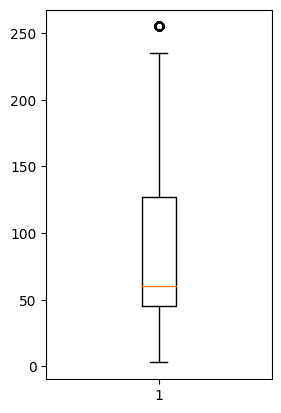

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(pokemon["Catch Rate"])
plt.show()

In [ ]:
pokemon["Catch Rate"].describe()

count    1235.000000
mean       92.149798
std        75.040309
min         3.000000
25%        45.000000
50%        60.000000
75%       127.000000
max       255.000000
Name: Catch Rate, dtype: float64

In [ ]:
pokemon['Easy to Catch'] = pokemon['Catch Rate'].apply(lambda x: x >= 127)

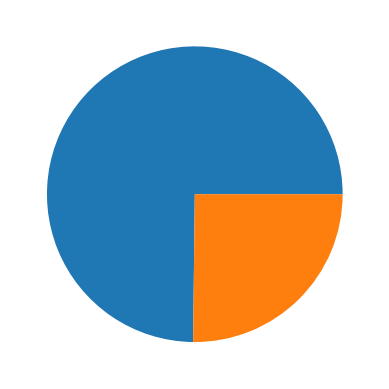

In [ ]:
plt.pie(pokemon['Easy to Catch'].value_counts())
plt.show()

Optimization terminated successfully.
         Current function value: 0.373601
         Iterations 7


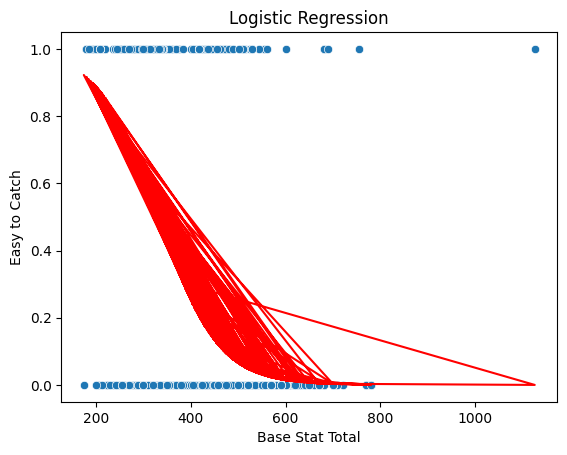

In [ ]:
classificador = 'Easy to Catch'
variavel = 'Base Stat Total'
sns.scatterplot(x=variavel, y=classificador, data=pokemon)

# Fit the logistic regression model
X = sm.add_constant(pokemon[variavel])
y = pokemon[classificador]
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

# Get the predicted probabilities for the logistic regression curve
predicted_probs = logit_results.predict(X)

# Plot the logistic regression curve
plt.plot(pokemon[variavel], predicted_probs, color='red')

# Set plot labels
plt.xlabel(variavel)
plt.ylabel(classificador)
plt.title('Logistic Regression')
plt.show()

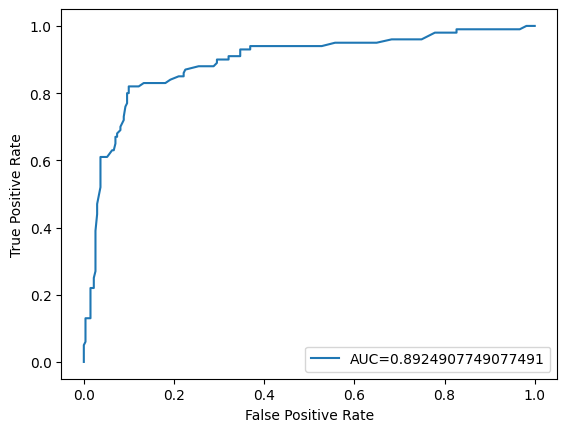

In [ ]:

#define the predictor variables and the response variable
XOld = pokemon[variavel].values.reshape(-1,1)
yOld = pokemon[classificador]

#split the dataset into training (70%) and testing (30%) sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(XOld,yOld,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train1,y_train1)
#define metrics
y_pred_proba = log_regression.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  y_pred_proba)
auc = metrics.roc_auc_score(y_test1, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

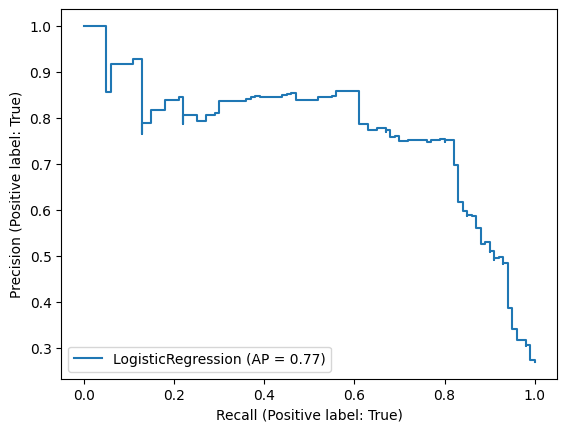

In [ ]:
PrecisionRecallDisplay.from_estimator(
   log_regression, X_test1, y_test1)

plt.show()

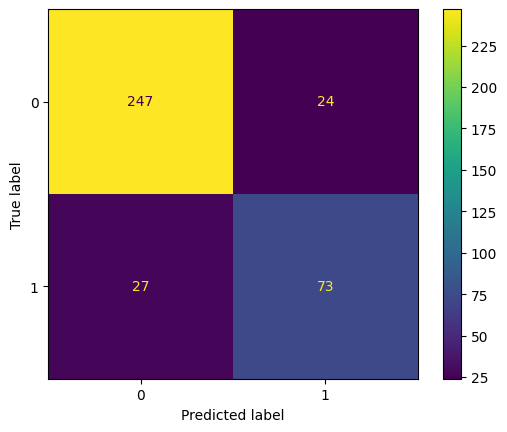

In [ ]:
cm = confusion_matrix(y_test1, log_regression.predict(X_test1))

cm_display = ConfusionMatrixDisplay(cm).plot()

F-Score é : 0.696
F-Score é : 0.757
F-Score é : 0.750


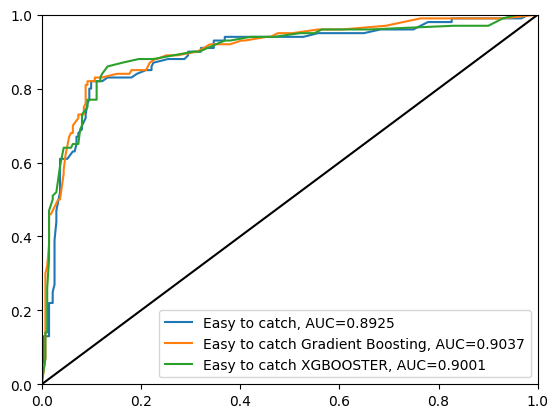

In [ ]:

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train1, y_train1)
y_pred1 = model.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred1)
auc = round(metrics.roc_auc_score(y_test1, y_pred1), 4)
plt.plot(fpr,tpr,label="Easy to catch, AUC="+str(auc))

y_predf1 = model.predict(XOld)
F1 =f1_score(yOld, y_predf1,labels=[classificador])
print(f'F-Score é : {F1:.3f}')

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train1, y_train1)
y_pred1 = model.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred1)
auc = round(metrics.roc_auc_score(y_test1, y_pred1), 4)
plt.plot(fpr,tpr,label="Easy to catch Gradient Boosting, AUC="+str(auc))


y_predf1 = model.predict(XOld)
F1 =f1_score(yOld, y_predf1,labels=[classificador])
print(f'F-Score é : {F1:.3f}')

xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
xgb_classifier.fit(X_train1, y_train1)
# Convert the model to a native API model
y_pred = xgb_classifier.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred)
auc = round(metrics.roc_auc_score(y_test1, y_pred), 4)
plt.plot(fpr,tpr,label="Easy to catch XGBOOSTER, AUC="+str(auc))
x=np.linspace(0,100,101)
plt.plot(x,x,'k-') # identity line


y_predf1 = xgb_classifier.predict(XOld)
F1 =f1_score(yOld, y_predf1,labels=[classificador])
print(f'F-Score é : {F1:.3f}')


plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()

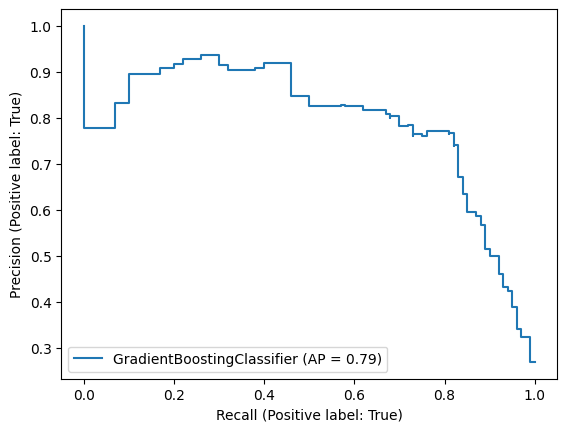

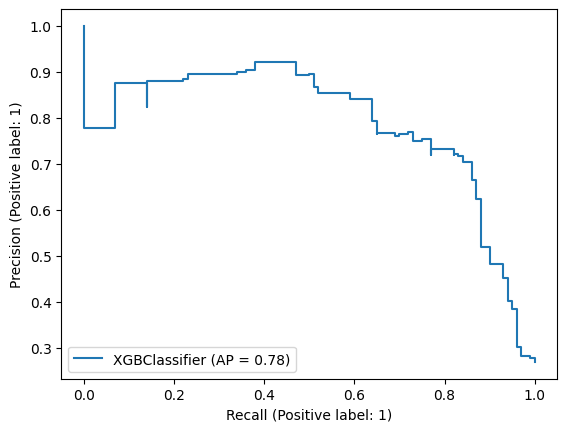

In [ ]:
disp1 = PrecisionRecallDisplay.from_estimator(
   model, X_test1, y_test1)
disp2 = PrecisionRecallDisplay.from_estimator(
   xgb_classifier, X_test1, y_test1)

Pokemon: Farfetch'd
Health: 1%
Status: Paralyzed
Ball: Ultra Ball
Catch rate: 45
Base catch prob: 30%

Catch probability: 52.59%

In [ ]:
pokemon['Hard to Catch'] = pokemon['Catch Rate'].apply(lambda x: x < 30)

In [ ]:
pokemon['Is Rare'] = pokemon['Legendary Type'].replace(np.nan, False)

In [ ]:
pokemon['Is Rare'] = pokemon['Is Rare'].where(pokemon['Is Rare']==False, True)

In [ ]:
pokemon['TTU'] = np.where((pokemon['Hard to Catch'] == True) & (pokemon['Is Rare'] == True), 1, 0)

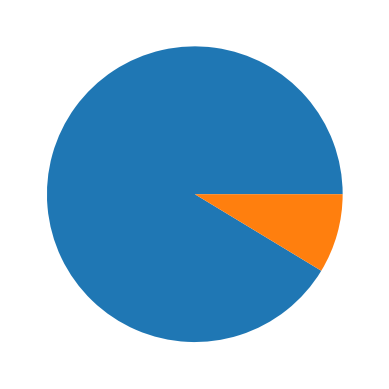

In [ ]:
plt.pie(pokemon['TTU'].value_counts())
plt.show()

Optimization terminated successfully.
         Current function value: 0.186047
         Iterations 8


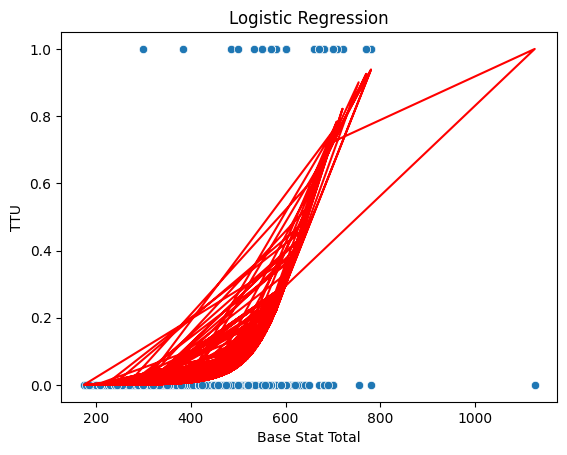

In [ ]:
classificador = 'TTU'
variavel = 'Base Stat Total'
sns.scatterplot(x=variavel, y=classificador, data=pokemon)

# Fit the logistic regression model
X = sm.add_constant(pokemon[variavel])
y = pokemon[classificador]
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

# Get the predicted probabilities for the logistic regression curve
predicted_probs = logit_results.predict(X)

# Plot the logistic regression curve
plt.plot(pokemon[variavel], predicted_probs, color='red')

# Set plot labels
plt.xlabel(variavel)
plt.ylabel(classificador)
plt.title('Logistic Regression')
plt.show()

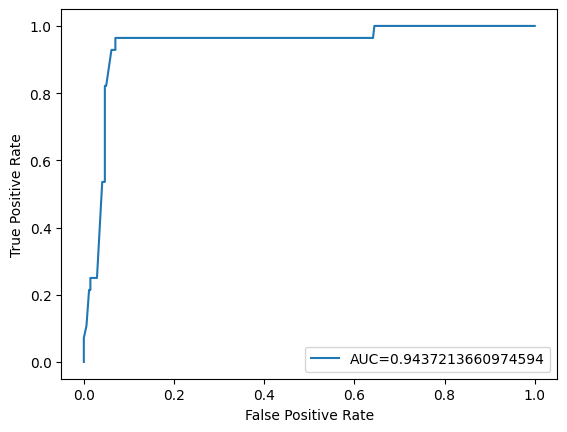

In [ ]:

#define the predictor variables and the response variable
X = pokemon[variavel].values.reshape(-1,1)
y = pokemon[classificador]

#split the dataset into training (70%) and testing (30%) sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train2,y_train2)
#define metrics
y_pred_proba = log_regression.predict_proba(X_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred_proba)
auc = metrics.roc_auc_score(y_test2, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

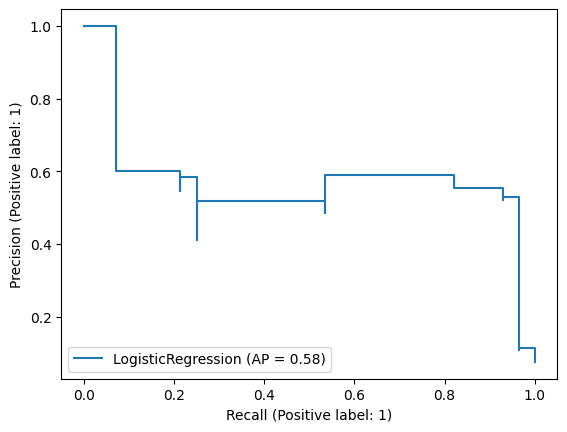

In [ ]:
PrecisionRecallDisplay.from_estimator(
   log_regression, X_test2, y_test2)

plt.show()

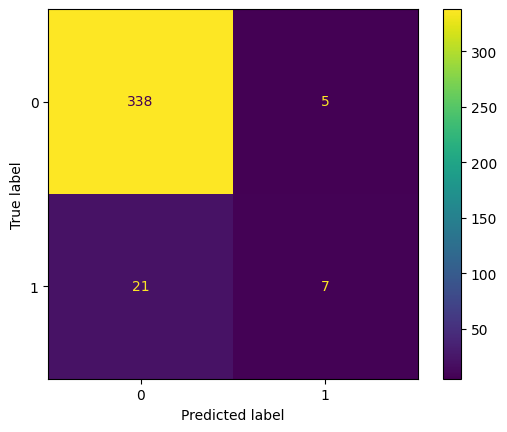

In [ ]:
cm = confusion_matrix(y_test2, log_regression.predict(X_test2))

cm_display = ConfusionMatrixDisplay(cm).plot()

F-Score é : 0.385
F-Score é : 0.660
F-Score é : 0.649


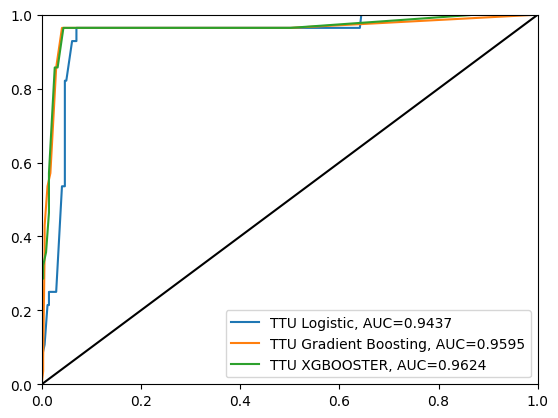

In [ ]:

#set up plotting area
plt.figure(0).clf()


#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train2, y_train2)
y_pred2 = model.predict_proba(X_test2)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test2, y_pred2)
auc = round(metrics.roc_auc_score(y_test2, y_pred2), 4)
plt.plot(fpr,tpr,label="TTU Logistic, AUC="+str(auc))

y_predf1 = model.predict(X)
F1 =f1_score(y, y_predf1,labels=[classificador])
print(f'F-Score é : {F1:.3f}')

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train2, y_train2)
y_pred2 = model.predict_proba(X_test2)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test2, y_pred2)
auc = round(metrics.roc_auc_score(y_test2, y_pred2), 4)
plt.plot(fpr,tpr,label="TTU Gradient Boosting, AUC="+str(auc))

y_predf1 = model.predict(X)
F1 =f1_score(y, y_predf1,labels=[classificador])
print(f'F-Score é : {F1:.3f}')

xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
xgb_classifier.fit(X_train2, y_train2)
# Convert the model to a native API model
y_pred = xgb_classifier.predict_proba(X_test2)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test2, y_pred)
auc = round(metrics.roc_auc_score(y_test2, y_pred), 4)
plt.plot(fpr,tpr,label="TTU XGBOOSTER, AUC="+str(auc))
x=np.linspace(0,100,101)
plt.plot(x,x,'k-') # identity line

y_predf1 = xgb_classifier.predict(X)
F1 =f1_score(y, y_predf1,labels=[classificador])
print(f'F-Score é : {F1:.3f}')

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()


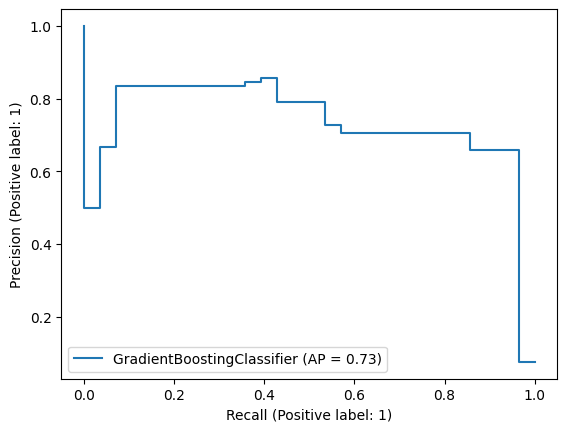

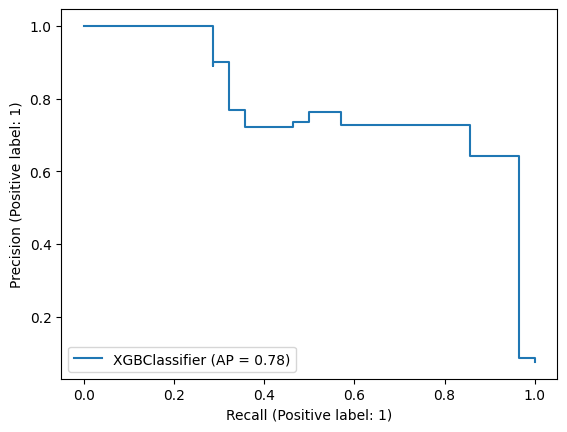

In [ ]:

disp1 = PrecisionRecallDisplay.from_estimator(
   model, X_test2, y_test2)

disp2 = PrecisionRecallDisplay.from_estimator(
   xgb_classifier, X_test2, y_test2)